In [24]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.datasets import make_circles

In [3]:
X,y = make_circles(1000,noise = 0.03,random_state=42)

#### Convert to Dataframe

In [4]:
circles = pd.DataFrame({"X0":X[:,0],"X1":X[:,1],"label":y})

#### Visualization

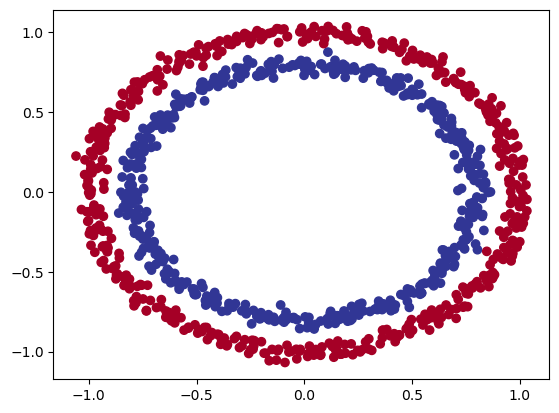

In [5]:
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu);

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### Tensorflow model building

In [7]:
import tensorflow as tf

In [8]:
model_one = tf.keras.Sequential([
    tf.keras.layers.Dense(128,activation="relu"),    
    tf.keras.layers.Dense(64,activation="relu"),
    tf.keras.layers.Dense(64,activation="relu"),
    tf.keras.layers.Dense(1,activation="sigmoid"),

])
model_one.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.legacy.Adam(),
                metrics=['accuracy'])
history = model_one.fit(X_train, y_train, epochs=25)

Epoch 1/25
25/25 [==============================] - 0s 461us/step - loss: 0.6924 - accuracy: 0.5225


2023-12-06 17:31:44.844008: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


Epoch 2/25
25/25 [==============================] - 0s 343us/step - loss: 0.6861 - accuracy: 0.5000
Epoch 3/25
25/25 [==============================] - 0s 393us/step - loss: 0.6805 - accuracy: 0.5537
Epoch 4/25
25/25 [==============================] - 0s 378us/step - loss: 0.6680 - accuracy: 0.5113
Epoch 5/25
25/25 [==============================] - 0s 413us/step - loss: 0.6454 - accuracy: 0.6112
Epoch 6/25
25/25 [==============================] - 0s 386us/step - loss: 0.5902 - accuracy: 0.8000
Epoch 7/25
25/25 [==============================] - 0s 380us/step - loss: 0.4719 - accuracy: 0.9475
Epoch 8/25
25/25 [==============================] - 0s 395us/step - loss: 0.2852 - accuracy: 0.9750
Epoch 9/25
25/25 [==============================] - 0s 391us/step - loss: 0.1368 - accuracy: 0.9962
Epoch 10/25
25/25 [==============================] - 0s 382us/step - loss: 0.0671 - accuracy: 1.0000
Epoch 11/25
25/25 [==============================] - 0s 400us/step - loss: 0.0380 - accuracy: 1.000

In [9]:
def plot_decision(X,y,model):
    xmin,xmax = X[:,0].min()-0.1,X[:,0].max()+0.1
    ymin,ymax = X[:,1].min()-0.1,X[:,1].max()+0.1
    xx, yy = np.meshgrid(np.linspace(xmin, xmax, 100),
                       np.linspace(ymin, ymax, 100))
    x_in = np.c_[xx.ravel(), yy.ravel()]
    y_pred = model.predict(x_in)
    
    if model.output_shape[-1] > 1:
        print("doing multiclass classification...")
        # We have to reshape our predictions to get them ready for plotting
        y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
    else:
        print("doing binary classifcation...")
        y_pred = np.round(np.max(y_pred, axis=1)).reshape(xx.shape)
        
    # Plot decision boundary
    plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
    plt.scatter(X[:, 0], X[:, 1],c=y, s=40, cmap=plt.cm.RdYlBu)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())   

In [10]:
# Evaluate our model on the test set
loss, accuracy = model_one.evaluate(X_test, y_test)
print(f"Model loss on the test set: {loss}")
print(f"Model accuracy on the test set: {100*accuracy:.2f}%")

7/7 [==============================] - 0s 491us/step - loss: 0.0105 - accuracy: 1.0000
Model loss on the test set: 0.010516914539039135
Model accuracy on the test set: 100.00%


313/313 [==============================] - 0s 188us/step
doing binary classifcation...
313/313 [==============================] - 0s 180us/step
doing binary classifcation...


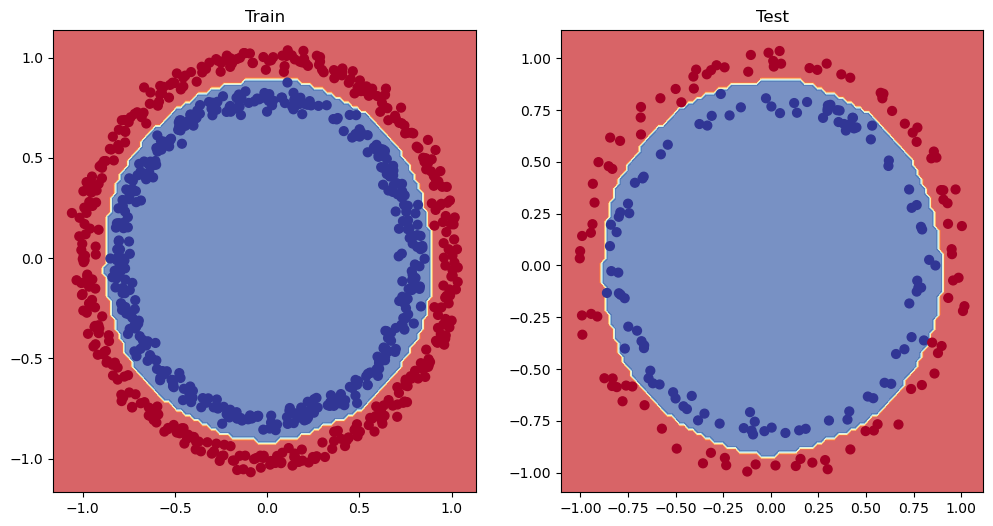

In [15]:
# Plot the decision boundaries for the training and test sets
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision(X=X_train, y=y_train,model=model_one)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision(X=X_test,y=y_test,model=model_one)
plt.show()

In [16]:
history_df = pd.DataFrame(history.history)
history_df

,loss,accuracy
0,0.692356,0.52250
1,0.686090,0.50000
2,0.680484,0.55375
3,0.668041,0.51125
4,0.645410,0.61125
5,0.590218,0.80000
6,0.471863,0.94750
7,0.285248,0.97500
8,0.136800,0.99625
9,0.067100,1.00000


Text(0.5, 1.0, 'Model One Loss curve')

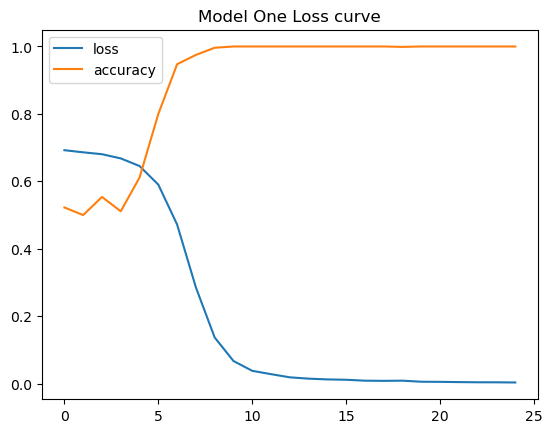

In [17]:
history_df.plot()
plt.title("Model One Loss curve")

In [ ]:
# Finding the best learning rate

In [18]:
# Learning rate callback
model_two = tf.keras.Sequential([
    tf.keras.layers.Dense(128,activation="relu"),
    tf.keras.layers.Dense(64,activation="relu"),
    tf.keras.layers.Dense(64,activation="relu"),
    tf.keras.layers.Dense(1,activation="sigmoid"),
])
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10**(epoch/20))
model_two.compile(loss = tf.keras.losses.BinaryCrossentropy(),
                  optimizer = tf.keras.optimizers.legacy.Adam(),
                  metrics = ['accuracy']
                 )
history = model_two.fit(X_train,y_train,epochs = 100,callbacks=[lr_scheduler])

Epoch 1/100
25/25 [==============================] - 0s 406us/step - loss: 0.6906 - accuracy: 0.5038 - lr: 1.0000e-04
Epoch 2/100
25/25 [==============================] - 0s 385us/step - loss: 0.6899 - accuracy: 0.4988 - lr: 1.1220e-04
Epoch 3/100
25/25 [==============================] - 0s 377us/step - loss: 0.6887 - accuracy: 0.5000 - lr: 1.2589e-04
Epoch 4/100
25/25 [==============================] - 0s 373us/step - loss: 0.6876 - accuracy: 0.5000 - lr: 1.4125e-04
Epoch 5/100
25/25 [==============================] - 0s 377us/step - loss: 0.6870 - accuracy: 0.5000 - lr: 1.5849e-04
Epoch 6/100
25/25 [==============================] - 0s 402us/step - loss: 0.6857 - accuracy: 0.5000 - lr: 1.7783e-04
Epoch 7/100
25/25 [==============================] - 0s 371us/step - loss: 0.6847 - accuracy: 0.5000 - lr: 1.9953e-04
Epoch 8/100
25/25 [==============================] - 0s 398us/step - loss: 0.6834 - accuracy: 0.5000 - lr: 2.2387e-04
Epoch 9/100
25/25 [==============================] - 0s 

25/25 [==============================] - 0s 375us/step - loss: 0.6724 - accuracy: 0.5200 - lr: 0.3162
Epoch 72/100
25/25 [==============================] - 0s 388us/step - loss: 0.7043 - accuracy: 0.4775 - lr: 0.3548
Epoch 73/100
25/25 [==============================] - 0s 379us/step - loss: 0.6975 - accuracy: 0.4850 - lr: 0.3981
Epoch 74/100
25/25 [==============================] - 0s 385us/step - loss: 0.7085 - accuracy: 0.5050 - lr: 0.4467
Epoch 75/100
25/25 [==============================] - 0s 391us/step - loss: 0.7162 - accuracy: 0.4825 - lr: 0.5012
Epoch 76/100
25/25 [==============================] - 0s 367us/step - loss: 0.7076 - accuracy: 0.5025 - lr: 0.5623
Epoch 77/100
25/25 [==============================] - 0s 368us/step - loss: 0.7105 - accuracy: 0.5000 - lr: 0.6310
Epoch 78/100
25/25 [==============================] - 0s 389us/step - loss: 0.7004 - accuracy: 0.4900 - lr: 0.7079
Epoch 79/100
25/25 [==============================] - 0s 351us/step - loss: 0.7010 - accuracy

In [19]:
pd.DataFrame(history.history)

,loss,accuracy,lr
0,0.690561,0.50375,0.000100
1,0.689873,0.49875,0.000112
2,0.688690,0.50000,0.000126
3,0.687639,0.50000,0.000141
4,0.687036,0.50000,0.000158
...,...,...,...
95,0.850548,0.48750,5.623413
96,0.775630,0.47250,6.309574
97,0.749343,0.51000,7.079458
98,0.868976,0.50500,7.943282


<Axes: >

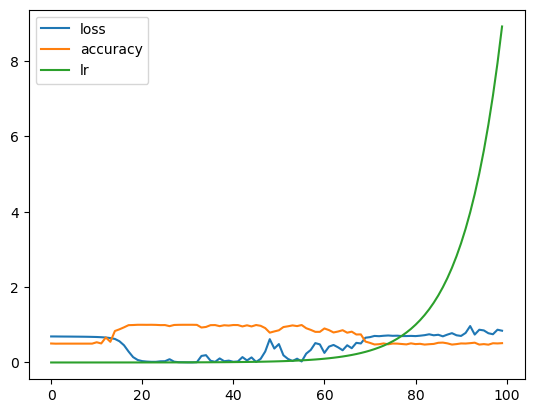

In [20]:
pd.DataFrame(history.history).plot()

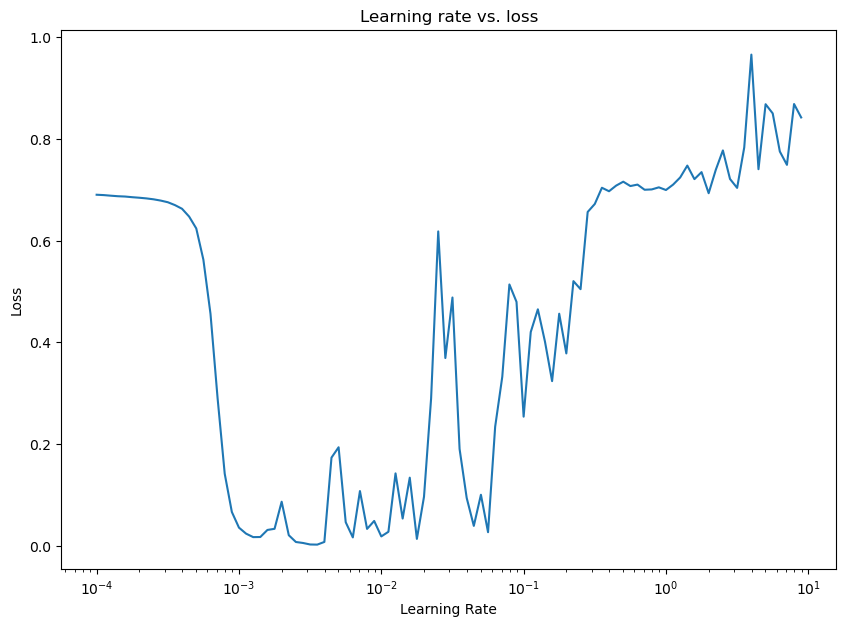

In [21]:
# Plot learning rate vs loss
lrs = 1e-4 * (10 ** (np.arange(100)/20))
plt.figure(figsize=(10, 7))
plt.semilogx(lrs, history.history["loss"]) # we want the x-axis (learning rate) to be log scale
plt.xlabel("Learning Rate")
plt.ylabel("Loss")
plt.title("Learning rate vs. loss");

#### Classification Evaluation Metrics

- Accuracy
- Precision
- Recall
- F1 Score
- Confusion Matrix

In [22]:
loss,accuracy = model_one.evaluate(X_test,y_test)
print(f"Model loss on the test set: {loss}")
print(f"Model accuracy on the test set: {100*accuracy:.2f}%")

7/7 [==============================] - 0s 800us/step - loss: 0.0105 - accuracy: 1.0000
Model loss on the test set: 0.010516914539039135
Model accuracy on the test set: 100.00%


7/7 [==============================] - 0s 600us/step


<Axes: >

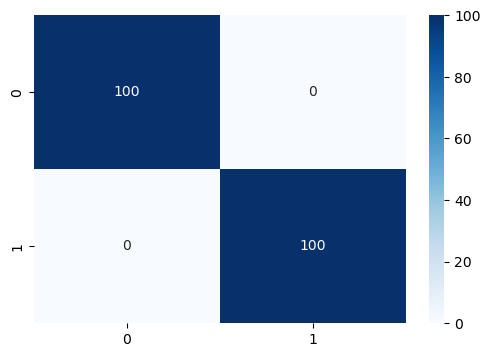

In [25]:
# Make predictions
y_preds = model_one.predict(X_test)
cm = tf.math.confusion_matrix(
    y_test,
    np.round(y_preds),
    num_classes=2,
    dtype=tf.dtypes.int32,
    name=None
)
plt.figure(figsize=(6, 4))
sns.heatmap(cm,annot=True, fmt="d", cmap="Blues")
